In [4]:
import pandas as pd

# Load the Excel file
file_path = '01JBGYSB95YQR6H8R6FMW3W2Z0.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names and load the first sheet to inspect its structure
sheet_names = excel_data.sheet_names
first_sheet = excel_data.parse(sheet_names[0])  # Load the first sheet as a DataFrame
print (sheet_names)
print ('\n')
first_sheet.head()


['Sheet1', 'Items ID', 'Category ID']




,Date,Time,Item ID,Category,Responsible Staff,Expected Quantity,Actual Quantity,Expired Items,Returned Items,Items Out for Sales,Items Out for Quality Control,Items Out for Events
0,2024-05-29,Evening,ITM006,CTG001,Bianca Țăran,37,33,3,4,6,8,2
1,2024-08-23,Afternoon,ITM004,CTG001,Irina Crăciun,36,31,2,3,6,8,3
2,2024-05-12,Evening,ITM001,CTG001,Sorin Săftoiu,44,44,3,4,7,7,3
3,2024-03-27,Evening,ITM003,CTG003,Marius Toma,30,26,2,4,6,8,2
4,2024-09-24,Evening,ITM002,CTG002,Bianca Țăran,62,64,3,4,7,8,2


In [7]:
# Print column names to identify the correct names
print("Column names in the dataset:", first_sheet.columns)

Column names in the dataset: Index(['Date', 'Time', 'Item ID', 'Category', 'Responsible Staff',
       'Expected Quantity', 'Actual Quantity', 'Expired Items',
       'Returned Items', 'Items Out for Sales',
       'Items Out for Quality Control', 'Items Out for Events'],
      dtype='object')


##### 1- Requirements
- Total Missing Items per Day
- Missing Items by Time of Day
- Missing Items by Staff
- Item-Level Analysis:
- Calculate the total missing quantities for each item.
- Identify the top two items with the highest missing quantities


In [8]:
# Calculate Missing Quantity
first_sheet['Missing Quantity'] = first_sheet['Expected Quantity'] - first_sheet['Actual Quantity']

In [31]:
# 1. Total Missing Items per Day
missing_per_day_df = first_sheet.groupby('Date')['Missing Quantity'].sum().reset_index()
missing_per_day_df

,Date,Missing Quantity
0,2024-01-01,13
1,2024-01-02,3
2,2024-01-03,1
3,2024-01-04,-5
4,2024-01-05,6
...,...,...
269,2024-09-26,5
270,2024-09-27,3
271,2024-09-28,-2
272,2024-09-29,2


In [44]:
# Highest Missing Quantity per Day
missing_per_day = first_sheet.groupby('Date')['Missing Quantity'].sum()
highest_missing_day = missing_per_day.idxmax()
highest_missing_quantity = missing_per_day.max()
highest_missing_quantity

23

In [24]:
# Total Missing Items
total_missing_items = first_sheet['Missing Quantity'].sum()
total_missing_items

-42

In [27]:
# Top Missing Item
item_missing_totals = first_sheet.groupby('Item ID')['Missing Quantity'].sum()
top_missing_item = item_missing_totals.idxmax()
top_missing_item_quantity = item_missing_totals.max()
top_missing_item_quantity

71

In [11]:
#2-Total Missing Items per Time of Day
total_missing_by_time_df = first_sheet.groupby('Time')['Missing Quantity'].sum().reset_index()
# Display the result
total_missing_by_time_df

,Time,Missing Quantity
0,Afternoon,-74
1,Evening,-52
2,Morning,84


In [40]:
# 3-Missing Patterns by Day of the Week
first_sheet['Day of Week'] = first_sheet['Date'].dt.day_name()
missing_by_day_of_week = first_sheet.groupby('Day of Week')['Missing Quantity'].sum().reset_index()

# Display the result
missing_by_day_of_week

,Day of Week,Missing Quantity
0,Friday,-52
1,Monday,-12
2,Saturday,11
3,Sunday,-42
4,Thursday,39
5,Tuesday,94
6,Wednesday,-80


In [12]:
# 4-Total Missing Items per Staff
total_missing_by_staff_df = first_sheet.groupby('Responsible Staff')['Missing Quantity'].sum().reset_index()

# Display the result
total_missing_by_staff_df

,Responsible Staff,Missing Quantity
0,Alin Gălățeanu,-8
1,Bianca Țăran,-31
2,Irina Crăciun,-25
3,Marius Toma,-28
4,Radu Călinescu,39
5,Sorin Săftoiu,11


In [34]:
# Staff Member with Most Missing Items
staff_missing_totals = first_sheet.groupby('Responsible Staff')['Missing Quantity'].sum()
top_staff_member = staff_missing_totals.idxmax()
top_staff_quantity = staff_missing_totals.max()
top_staff_quantity

39

In [13]:
# 5- total missing quantities for each item
total_missing_by_item_df = first_sheet.groupby('Item ID')['Missing Quantity'].sum().reset_index()

# Display the result
total_missing_by_item_df

,Item ID,Missing Quantity
0,ITM001,-16
1,ITM002,71
2,ITM003,-35
3,ITM004,-35
4,ITM005,42
5,ITM006,-69


In [14]:
# 6- top two items with the highest missing quantities
top_two_missing_items_df = total_missing_by_item_df.nlargest(2, 'Missing Quantity')

# Display the result
top_two_missing_items_df

,Item ID,Missing Quantity
1,ITM002,71
4,ITM005,42


##### 2- Let’s start with the visuals for the KPIs:

- Total Missing Items by Day (line chart)
- Top Missing Item (bar chart)
- Staff Member with Most Missing Items (bar chart)
- Top 2 Items with Missing Quantities (bar chart)
- Missing Quantities by Shift (bar chart)
- Missing Patterns by Day of the Week (bar chart)

In [15]:
# Visualizations for KPI

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for aesthetics
sns.set(style="whitegrid")

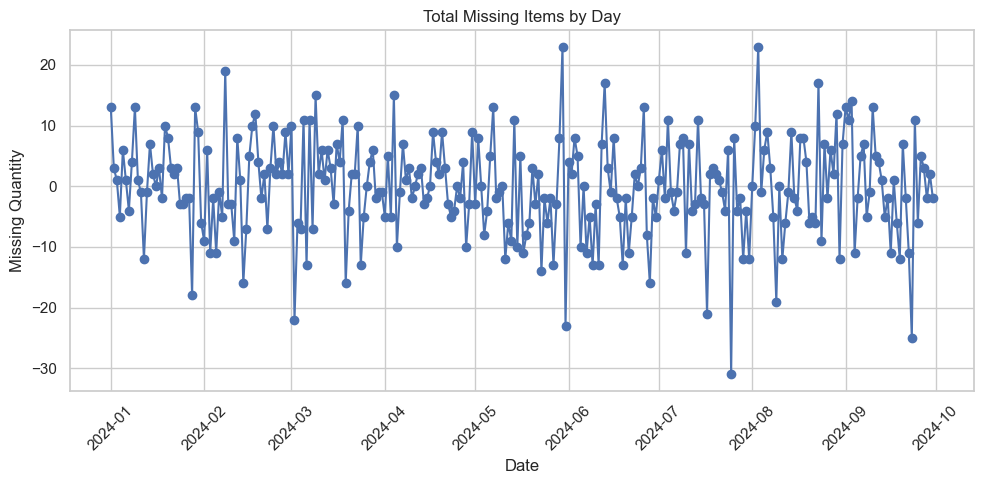

In [16]:
#1- Total Missing Items by Day
plt.figure(figsize=(10, 5))
plt.plot(missing_per_day_df['Date'], missing_per_day_df['Missing Quantity'], marker='o', color='b')
plt.title("Total Missing Items by Day")
plt.xlabel("Date")
plt.ylabel("Missing Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

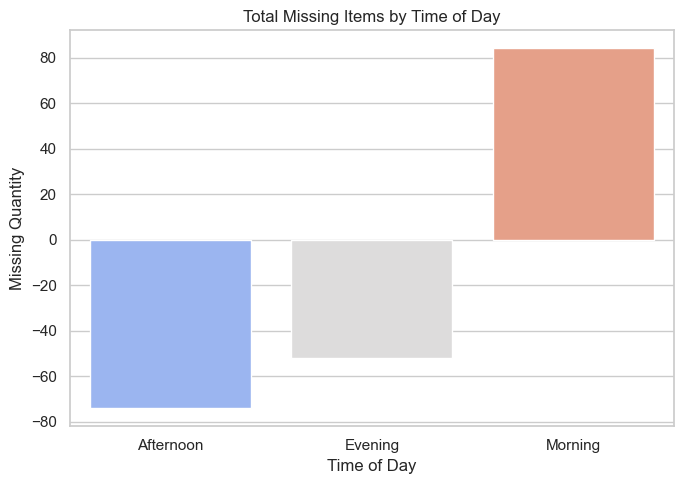

In [17]:
# 2. Total Missing Items by Time of Day
plt.figure(figsize=(7, 5))
sns.barplot(data=total_missing_by_time_df, x="Time", y="Missing Quantity", palette="coolwarm")
plt.title("Total Missing Items by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Missing Quantity")
plt.tight_layout()
plt.show()

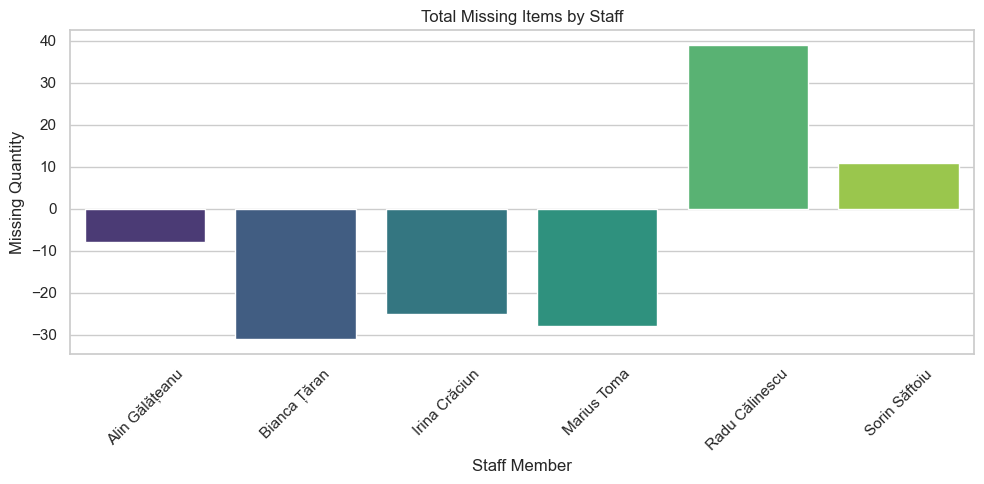

In [18]:
# 3. Total Missing Items by Staff
plt.figure(figsize=(10, 5))
sns.barplot(data=total_missing_by_staff_df, x="Responsible Staff", y="Missing Quantity", palette="viridis")
plt.title("Total Missing Items by Staff")
plt.xlabel("Staff Member")
plt.ylabel("Missing Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

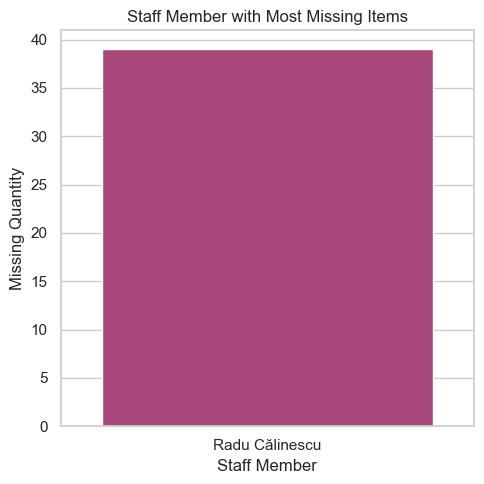

In [19]:
# 4. Staff Member with the Most Missing Items
top_staff_member_df = total_missing_by_staff_df.loc[total_missing_by_staff_df['Missing Quantity'].idxmax()]
plt.figure(figsize=(5, 5))
sns.barplot(x=[top_staff_member_df['Responsible Staff']], y=[top_staff_member_df['Missing Quantity']], palette="magma")
plt.title("Staff Member with Most Missing Items")
plt.xlabel("Staff Member")
plt.ylabel("Missing Quantity")
plt.tight_layout()
plt.show()


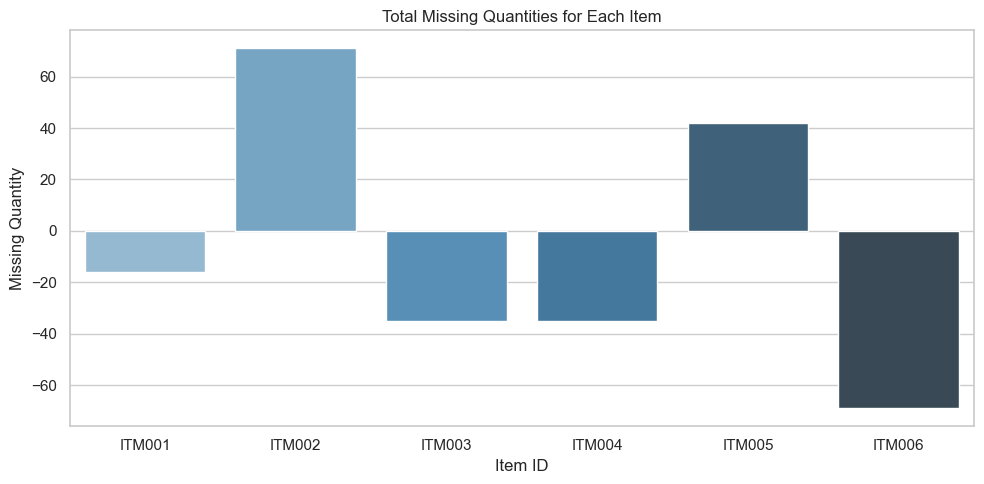

In [20]:
# 5. Total Missing Quantities for Each Item
plt.figure(figsize=(10, 5))
sns.barplot(data=total_missing_by_item_df, x="Item ID", y="Missing Quantity", palette="Blues_d")
plt.title("Total Missing Quantities for Each Item")
plt.xlabel("Item ID")
plt.ylabel("Missing Quantity")
plt.tight_layout()
plt.show()

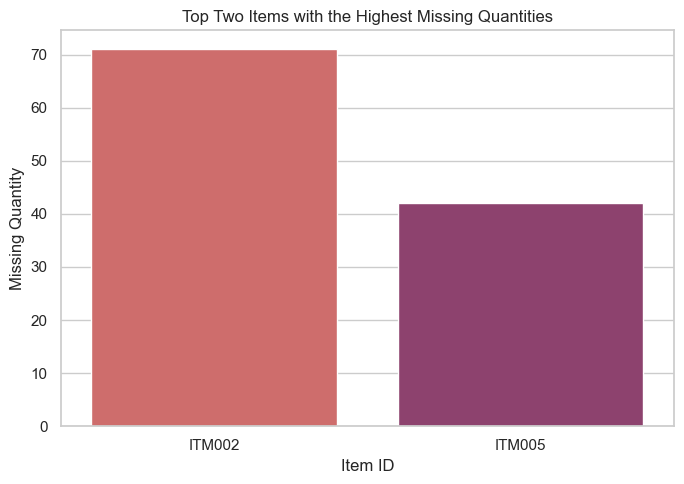

In [21]:
# 6. Top Two Items with the Highest Missing Quantities
plt.figure(figsize=(7, 5))
sns.barplot(data=top_two_missing_items_df, x="Item ID", y="Missing Quantity", palette="flare")
plt.title("Top Two Items with the Highest Missing Quantities")
plt.xlabel("Item ID")
plt.ylabel("Missing Quantity")
plt.tight_layout()
plt.show()

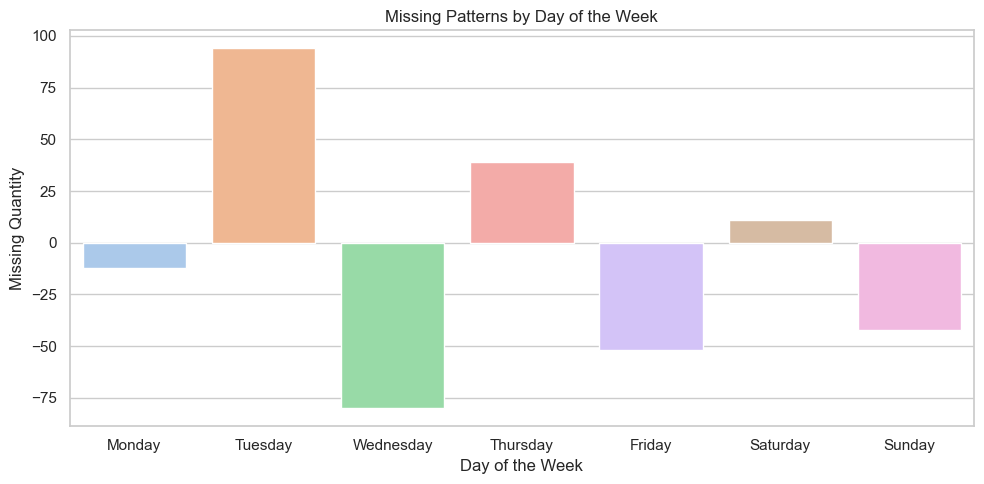

In [22]:
# 7. Recalculate the Missing Patterns by Day of the Week
# Ensure 'Weekday' column is created based on 'Date' field
first_sheet['Weekday'] = pd.to_datetime(first_sheet['Date']).dt.day_name()

# Group by 'Weekday' and sum the 'Missing Quantity' for each day of the week, reindexing for correct order
missing_by_weekday_df = first_sheet.groupby('Weekday')['Missing Quantity'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

# Visualization for Missing Patterns by Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_by_weekday_df, x="Weekday", y="Missing Quantity", palette="pastel")
plt.title("Missing Patterns by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Missing Quantity")
plt.tight_layout()
plt.show()


In [51]:
# KPI Summary
kpi_summary = pd.DataFrame({
    'Metric': [
        'Total Missing Items', 
        'Highest Missing Quantity per Day', 
        'Top Missing Item', 
        'Staff Member with Most Missing Items'
    ],
    'Value': [
        total_missing_items, 
        highest_missing_quantity, 
        top_missing_item, 
        top_staff_member
    ]
})
kpi_summary

,Metric,Value
0,Total Missing Items,-42
1,Highest Missing Quantity per Day,23
2,Top Missing Item,ITM002
3,Staff Member with Most Missing Items,Radu Călinescu


##### 3- Interactive Filtering & Slicers

In [23]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load the dataset (assuming `first_sheet` is the DataFrame with missing quantities calculated)
first_sheet['Date'] = pd.to_datetime(first_sheet['Date'])
first_sheet['Weekday'] = first_sheet['Date'].dt.day_name()  # Day of the week for trends

app = dash.Dash(__name__)

# Dashboard layout
app.layout = html.Div([
    html.H1("Interactive Missing Items Dashboard"),

    # Filters/Slicers
    html.Label("Filter by Date:"),
    dcc.Dropdown(
        id='date-filter',
        options=[{'label': pd.to_datetime(date).strftime('%Y-%m-%d'), 'value': date} for date in sorted(first_sheet['Date'].unique())],
        multi=True,
        placeholder="Select date(s)"
    ),
    
    html.Label("Filter by Time of Day:"),
    dcc.Dropdown(
        id='time-filter',
        options=[{'label': time, 'value': time} for time in first_sheet['Time'].unique()],
        multi=True,
        placeholder="Select time(s) of day"
    ),
    
    html.Label("Filter by Staff Member:"),
    dcc.Dropdown(
        id='staff-filter',
        options=[{'label': staff, 'value': staff} for staff in first_sheet['Responsible Staff'].unique()],
        multi=True,
        placeholder="Select staff member(s)"
    ),
    
    html.Label("Filter by Item Category:"),
    dcc.Dropdown(
        id='category-filter',
        options=[{'label': category, 'value': category} for category in first_sheet['Category'].unique()],
        multi=True,
        placeholder="Select item category"
    ),

    # Graphs
    dcc.Graph(id='missing-items-trend'),
    dcc.Graph(id='missing-by-time'),
    dcc.Graph(id='missing-by-staff'),
    dcc.Graph(id='top-missing-items')
])

# Callbacks to update the visualizations based on filters
@app.callback(
    [
        Output('missing-items-trend', 'figure'),
        Output('missing-by-time', 'figure'),
        Output('missing-by-staff', 'figure'),
        Output('top-missing-items', 'figure')
    ],
    [
        Input('date-filter', 'value'),
        Input('time-filter', 'value'),
        Input('staff-filter', 'value'),
        Input('category-filter', 'value')
    ]
)
def update_dashboard(selected_dates, selected_times, selected_staff, selected_category):
    # Filter data based on slicer selections
    filtered_data = first_sheet.copy()
    if selected_dates:
        filtered_data = filtered_data[filtered_data['Date'].isin(selected_dates)]
    if selected_times:
        filtered_data = filtered_data[filtered_data['Time'].isin(selected_times)]
    if selected_staff:
        filtered_data = filtered_data[filtered_data['Responsible Staff'].isin(selected_staff)]
    if selected_category:
        filtered_data = filtered_data[filtered_data['Category'].isin(selected_category)]
    
    # Create figures
    # Missing Items Trend
    missing_trend = px.line(filtered_data.groupby('Date')['Missing Quantity'].sum().reset_index(),
                            x='Date', y='Missing Quantity', title="Missing Items Trend Over Time")

    # Missing Items by Time of Day
    missing_by_time = px.bar(filtered_data.groupby('Time')['Missing Quantity'].sum().reset_index(),
                             x='Time', y='Missing Quantity', title="Missing Items by Time of Day")

    # Missing Items by Staff
    missing_by_staff = px.bar(filtered_data.groupby('Responsible Staff')['Missing Quantity'].sum().reset_index(),
                              x='Responsible Staff', y='Missing Quantity', title="Missing Items by Staff")
    
    # Top Missing Items
    top_missing_items = filtered_data.groupby('Item ID')['Missing Quantity'].sum().nlargest(5).reset_index()
    top_missing_items_chart = px.bar(top_missing_items, x='Item ID', y='Missing Quantity', title="Top Missing Items")

    return missing_trend, missing_by_time, missing_by_staff, top_missing_items_chart

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
